### Figures and Tables of Lectue 4

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/lecture4/visuals/lecture4.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')
from tabulate import tabulate

In [2]:
colors = {0:['#264653','#219D8F','#E9C46A','#F4A261','#E76F51'],
  1:['#003049','#D62828','#F77F00','#FCBF49','#EAE2B7'],
  2:['#F72585','#7209B7','#3A0CA3','#4361EE','#4CC9F0'],
  3: ['#165aa7','#cb495c','#bb60d5','#f47915','#06ab54','#002070','#b27d12','#007030']}

In [3]:
# Penn World Tables, version 10.0
# Accessed from https://www.rug.nl/ggdc/productivity/pwt/?lang=en
# Read in legend
pwt_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Legend')
# Drop entries with missing data
pwt_legend.dropna(inplace=True)
# Create a dictionary of variable descriptions
pwt_legend = dict(zip(pwt_legend['Variable name'],pwt_legend['Variable definition']))

In [4]:
# Read in the data
df = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')

In [5]:
# How the data looks like
df.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12805,ZWE,Zimbabwe,US Dollar,2015,40142.488281,39794.128906,13.814629,6.393752,NaN,2.584653,...,0.140195,-0.287796,-0.051930,0.479178,0.651252,0.541670,0.616610,0.533067,0.422764,1.534175
12806,ZWE,Zimbabwe,US Dollar,2016,41876.109375,40958.945312,14.030331,6.504374,NaN,2.616257,...,0.131986,-0.251359,-0.016258,0.470550,0.650997,0.540076,0.619493,0.519469,0.416510,1.492129
12807,ZWE,Zimbabwe,US Dollar,2017,44671.093750,44311.761719,14.236595,6.611773,NaN,2.648248,...,0.126835,-0.203039,-0.039897,0.473402,0.639409,0.520766,0.619253,0.551528,0.415592,1.515128
12808,ZWE,Zimbabwe,US Dollar,2018,44319.914062,43408.386719,14.438802,6.714952,NaN,2.680630,...,0.144641,-0.264225,-0.020791,0.543600,0.654927,0.530694,0.640972,0.560584,0.425143,1.590753
12809,ZWE,Zimbabwe,US Dollar,2019,42293.992188,40820.296875,14.645468,6.831017,NaN,2.713408,...,0.213836,-0.271580,-0.089798,0.494539,0.652158,0.501721,0.487266,0.429213,0.420675,1.384638


In [6]:
# We will calculate GDP per capita and GDP per worker 

print('cgdpe = ',pwt_legend['cgdpe'])
print('pop = ', pwt_legend['pop'])
print('emp = ', pwt_legend['emp'])

df['gdpPercap'] = df['cgdpe']/df['pop']/1.0e6*1000
df['gdpPerworker'] = df['cgdpe']/df['emp']/1.0e6*1000

cgdpe =  Expenditure-side real GDP at current PPPs (in mil. 2017US$)
pop =  Population (in millions)
emp =  Number of persons engaged (in millions)


In [7]:
# df_fundamentals = (df[df.year.isin(np.arange(1970,2018))]
#                    .groupby(['countrycode','country'])['csh_i'].mean().reset_index().rename(columns={'csh_i':'Investment rate'}))

In [8]:
df.sort_values(['countrycode','year'],inplace=True)

In [9]:
init_year = 1970 # the first year in our analysis
last_year = 2019 # the last year in our analysis

# For each country, get the GDP per worker and GDP per capita, emp, pop, hc in year 2019

df_fundamentals = (df[df.year == last_year]
                   .groupby(['countrycode','country'])[
                       ['gdpPercap','gdpPerworker','emp','pop','hc']].mean().reset_index())

In [10]:
df_fundamentals.head()

,countrycode,country,gdpPercap,gdpPerworker,emp,pop,hc
0,ABW,Aruba,36.801608,82.194394,0.047601,0.106314,NaN
1,AGO,Angola,7.156809,13.683874,16.644962,31.825295,1.481984
2,AIA,Anguilla,25.233109,NaN,NaN,0.014869,NaN
3,ALB,Albania,12.430317,33.284495,1.075898,2.880917,2.964992
4,ARE,United Arab Emirates,69.425226,116.774068,5.808834,9.770529,2.746695


In [11]:
# Select the years from 1970 to 2019

# First sort the original dataset
df.sort_values(['countrycode','year'],inplace=True)

# Calculate the population growth rate
# average growth rate = (pop(2019)/pop(1970))^(1/(49))-1

# first select years 1970 amd 2019
# then apply the above formula for each country
# rename the new variable to Population growth
df_pop_growth = (df[df.year.isin([init_year,last_year])]
                 .groupby(['countrycode']).apply(lambda x: (x['pop'].values[1]/x['pop'].values[0])
                                                 **(1/(last_year-init_year))-1)
                 .reset_index().rename(columns={0:'Population growth'}))

# Calculate the employment growth rate
# average growth rate = (emp(2019)/emp(1970))^(1/(49))-1

# first select years 1970 amd 2019
# then apply the above formula for each country
# rename the new variable to Employment growth
df_emp_growth = (df[df.year.isin([init_year,last_year])]
                 .groupby(['countrycode']).apply(lambda x: (x['emp'].values[1]/x['emp'].values[0])
                                                 **(1/(last_year-init_year))-1)
                 .reset_index().rename(columns={0:'Employment growth'}))

In [12]:
# merge GDP per worker data with employment and population growth rate
df_fundamentals= (df_fundamentals.merge(df_emp_growth,on=['countrycode'],how='left')
                  .merge(df_pop_growth,on=['countrycode'],how='left'))

In [13]:
df_fundamentals.head()

,countrycode,country,gdpPercap,gdpPerworker,emp,pop,hc,Employment growth,Population growth
0,ABW,Aruba,36.801608,82.194394,0.047601,0.106314,NaN,NaN,0.012068
1,AGO,Angola,7.156809,13.683874,16.644962,31.825295,1.481984,0.031358,0.035027
2,AIA,Anguilla,25.233109,NaN,NaN,0.014869,NaN,NaN,0.016183
3,ALB,Albania,12.430317,33.284495,1.075898,2.880917,2.964992,0.006873,0.005983
4,ARE,United Arab Emirates,69.425226,116.774068,5.808834,9.770529,2.746695,0.086005,0.079086


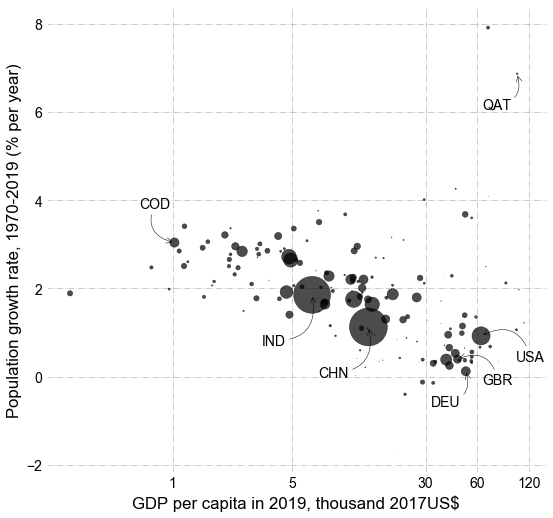

In [14]:
# yticks = np.array([1,5,30,60],dtype=int)
xticks = np.array([1,5,30,60,120],dtype=int)
data = df_fundamentals.copy()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data.gdpPercap,data['Population growth']*100,color='k',sizes=data['pop'],alpha=.7)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_yticks(yticks)
#ax.set_yticklabels((yticks))
ax.set_xticks(xticks)
ax.set_xticklabels((xticks))
ax.set_xlabel(f'GDP per capita in {last_year}, thousand 2017US$')
ax.set_ylabel(f'Population growth rate, {init_year}-{last_year} (% per year)')
usa_ = data[data.countrycode=='USA'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
gbr_ = data[data.countrycode=='GBR'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
chn_ = data[data.countrycode=='CHN'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
ind_ = data[data.countrycode=='IND'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
deu_ = data[data.countrycode=='DEU'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
qat_ = data[data.countrycode=='QAT'][['gdpPercap','Population growth']].values[0]*np.array([1,100])
cod_ = data[data.countrycode=='COD'][['gdpPercap','Population growth']].values[0]*np.array([1,100])

ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(35, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(-35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "COD", xy=(cod_[0],cod_[1]), xycoords="data",
    xytext=(-35, +35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "QAT", xy=(qat_[0],qat_[1]), xycoords="data",
    xytext=(-35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(-50, -50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(-50, -50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('../files/gdp-cap-pop-growth-label.svg',bbox_inches='tight')

In [15]:
# Read in the food supply data
# Data from FAO (via [Our World in Data](https://ourworldindata.org/food-supply#caloric-supply-by-region))
food_supply = pd.read_csv('./food-supply-by-region-kilocalories.csv')

In [16]:
# Rename the variable to Code to be able mactch datasets
food_supply.rename(columns={'Code':'countrycode'},inplace=True)

In [17]:
# Merge with fundamentals data
df_fundamentals=df_fundamentals.merge(food_supply[food_supply.Year == 2013][
    ['countrycode','Food supply']],on='countrycode',how='left')

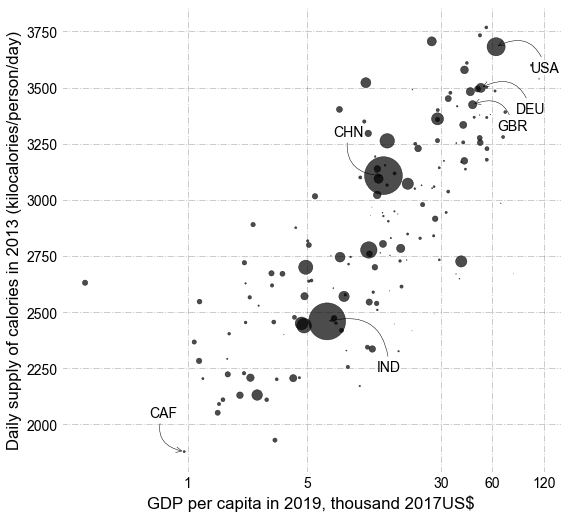

In [18]:
# yticks = np.array([1,5,30,60],dtype=int)
xticks = np.array([1,5,30,60,120],dtype=int)
data = df_fundamentals.copy()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data.gdpPercap,data['Food supply'],color='k',sizes=data['pop'],alpha=.7)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_yticks(yticks)
#ax.set_yticklabels((yticks))
ax.set_xticks(xticks)
ax.set_xticklabels((xticks))
ax.set_xlabel(f'GDP per capita in {last_year}, thousand 2017US$')
ax.set_ylabel('Daily supply of calories in 2013 (kilocalories/person/day)')
usa_ = data[data.countrycode=='USA'][['gdpPercap','Food supply']].values[0]
gbr_ = data[data.countrycode=='GBR'][['gdpPercap','Food supply']].values[0]
chn_ = data[data.countrycode=='CHN'][['gdpPercap','Food supply']].values[0]
ind_ = data[data.countrycode=='IND'][['gdpPercap','Food supply']].values[0]
deu_ = data[data.countrycode=='DEU'][['gdpPercap','Food supply']].values[0]
qat_ = data[data.countrycode=='QAT'][['gdpPercap','Food supply']].values[0]
caf_ = data[data.countrycode=='CAF'][['gdpPercap','Food supply']].values[0]

ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(35, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(35, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CAF", xy=(caf_[0],caf_[1]), xycoords="data",
    xytext=(-35, +35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(-50, 40), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(50, -50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('../files/gdp-cap-food-label.svg',bbox_inches='tight')

In [19]:
# Calorie intake in CAF relative to the US
(df_fundamentals[df_fundamentals.countrycode=='CAF']['Food supply'].values[0]
 /df_fundamentals[df_fundamentals.countrycode=='USA']['Food supply'].values[0]).round(decimals=1)

0.5

In [20]:
# Read in the life expectancy data
# World Bank (via [Our World in Data]
# (https://ourworldindata.org/life-expectancy#differences-in-life-expectancy-across-the-world))
life_expectancy = pd.read_csv('./life-expectancy.csv')

In [21]:
# Rename 
life_expectancy.rename(columns={'Code':'countrycode'},inplace=True)

In [22]:
# Merge
df_fundamentals=df_fundamentals.merge(life_expectancy[life_expectancy.Year == 2019][
    ['countrycode','Life expectancy']],on='countrycode',how='left')

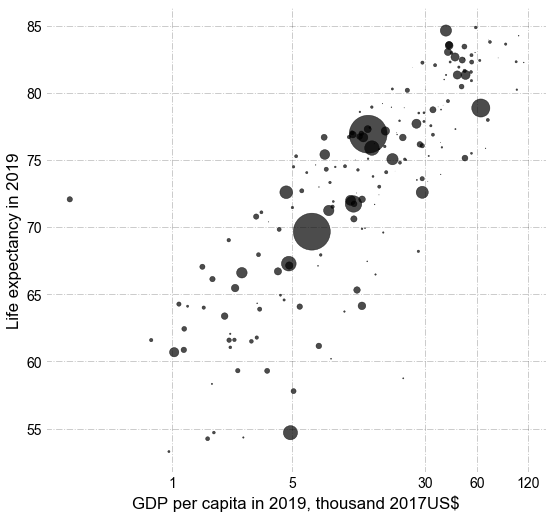

In [23]:
# yticks = np.array([1,5,30,60],dtype=int)
xticks = np.array([1,5,30,60,120],dtype=int)
data = df_fundamentals.copy()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data.gdpPercap,data['Life expectancy'],color='k',sizes=data['pop'],alpha=.7)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_yticks(yticks)
#ax.set_yticklabels((yticks))
ax.set_xticks(xticks)
ax.set_xticklabels((xticks))
ax.set_xlabel(f'GDP per capita in {last_year}, thousand 2017US$')
ax.set_ylabel('Life expectancy in 2019')
usa_ = data[data.countrycode=='USA'][['gdpPercap','Life expectancy']].values[0]
gbr_ = data[data.countrycode=='GBR'][['gdpPercap','Life expectancy']].values[0]
chn_ = data[data.countrycode=='CHN'][['gdpPercap','Life expectancy']].values[0]
ind_ = data[data.countrycode=='IND'][['gdpPercap','Life expectancy']].values[0]
deu_ = data[data.countrycode=='DEU'][['gdpPercap','Life expectancy']].values[0]
qat_ = data[data.countrycode=='QAT'][['gdpPercap','Life expectancy']].values[0]
caf_ = data[data.countrycode=='CAF'][['gdpPercap','Life expectancy']].values[0]
nga_ = data[data.countrycode=='NGA'][['gdpPercap','Life expectancy']].values[0]
# ax.annotate(
#     "USA", xy=(usa_[0],usa_[1]), xycoords="data",
#     xytext=(35, -35), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
#     xytext=(-50, 25), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
#     xytext=(35, -20), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "CAF", xy=(caf_[0],caf_[1]), xycoords="data",
#     xytext=(25, +35), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
#     xytext=(-50, 40), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "IND", xy=(ind_[0],ind_[1]), xycoords="data",
#     xytext=(50, -50), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
# ax.annotate(
#     "NGA", xy=(nga_[0],nga_[1]), xycoords="data",
#     xytext=(35, 35), textcoords="offset points",
#     arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('../files/gdp-cap-life.svg',bbox_inches='tight')

In [24]:
# Example of countries with low life expectancy
df_fundamentals[df_fundamentals['Life expectancy']<=55]

,countrycode,country,gdpPercap,gdpPerworker,emp,pop,hc,Employment growth,Population growth,Food supply,Life expectancy
29,CAF,Central African Republic,0.953415,2.452997,1.844328,4.745185,1.561627,NaN,0.019851,1879.0,53.283
100,LSO,Lesotho,2.594118,8.268164,0.666798,2.125268,1.699462,NaN,0.014914,2529.0,54.331
124,NGA,Nigeria,4.886938,13.449592,73.020554,200.963599,1.974245,0.025056,0.026427,2700.0,54.687
147,SLE,Sierra Leone,1.745263,5.378015,2.535530,7.813215,1.645116,NaN,0.021578,2404.0,54.696
160,TCD,Chad,1.604877,4.297386,5.955429,15.946876,NaN,0.029328,0.030587,2110.0,54.239


In [25]:
# Example of countries with high life expectancy
df_fundamentals[df_fundamentals['Life expectancy']>=80]

,countrycode,country,gdpPercap,gdpPerworker,emp,pop,hc,Employment growth,Population growth,Food supply,Life expectancy
2,AIA,Anguilla,25.233109,NaN,NaN,0.014869,NaN,NaN,0.016183,NaN,81.877
8,AUS,Australia,50.688101,99.314695,12.863174,25.203198,3.549666,0.017601,0.013934,3276.0,83.436
9,AUT,Austria,55.399502,109.028032,4.550281,8.955102,3.381046,0.006797,0.003581,3768.0,81.544
12,BEL,Belgium,50.870185,119.263576,4.921937,11.539328,3.149034,0.005704,0.003694,3733.0,81.628
22,BMU,Bermuda,79.826219,145.864138,0.034207,0.062506,NaN,NaN,0.003541,2671.0,82.593
30,CAN,Canada,49.235617,95.444751,19.298662,37.411047,3.721066,0.017733,0.011489,3494.0,82.434
31,CHE,Switzerland,71.464743,122.521374,5.011205,8.591365,3.702678,0.009396,0.006843,3391.0,83.779
32,CHL,Chile,23.528749,55.051085,8.100072,18.952038,3.145769,0.022730,0.013586,2979.0,80.181
41,CRI,Costa Rica,19.231361,43.021354,2.256356,5.047561,2.694772,0.030820,0.020725,2848.0,80.279
43,CYM,Cayman Islands,70.044595,100.898758,0.045087,0.064948,NaN,NaN,0.040821,NaN,83.924


In [26]:
# since we will calculate every thing relative to the US
# select the usa data from df_fundamentals
usa = df_fundamentals.query("countrycode=='USA'")

In [27]:
# Add USA data as seperate columns
df_fundamentals['Population growth, USA'] = usa['Population growth'].values[0]
df_fundamentals['Employment growth, USA'] = usa['Employment growth'].values[0]
df_fundamentals['hc, USA'] = usa['hc'].values[0]
df_fundamentals['gdpPerworker, USA'] = usa['gdpPerworker'].values[0]
df_fundamentals['gdpPercap, USA'] = usa['gdpPercap'].values[0]

In [28]:
df_fundamentals.head()

,countrycode,country,gdpPercap,gdpPerworker,emp,pop,hc,Employment growth,Population growth,Food supply,Life expectancy,"Population growth, USA","Employment growth, USA","hc, USA","gdpPerworker, USA","gdpPercap, USA"
0,ABW,Aruba,36.801608,82.194394,0.047601,0.106314,NaN,NaN,0.012068,NaN,76.293,0.009256,0.012845,3.749341,131.369739,63.196576
1,AGO,Angola,7.156809,13.683874,16.644962,31.825295,1.481984,0.031358,0.035027,2473.0,61.147,0.009256,0.012845,3.749341,131.369739,63.196576
2,AIA,Anguilla,25.233109,NaN,NaN,0.014869,NaN,NaN,0.016183,NaN,81.877,0.009256,0.012845,3.749341,131.369739,63.196576
3,ALB,Albania,12.430317,33.284495,1.075898,2.880917,2.964992,0.006873,0.005983,3193.0,78.573,0.009256,0.012845,3.749341,131.369739,63.196576
4,ARE,United Arab Emirates,69.425226,116.774068,5.808834,9.770529,2.746695,0.086005,0.079086,3280.0,77.972,0.009256,0.012845,3.749341,131.369739,63.196576


$$y^\ast = A^{1/(1-\alpha)}\left(\frac{\gamma}{\delta+n} \right)^{\alpha/(1-\alpha)}h$$

In [29]:
# define alpha
alpha=1/3
delta = .05
alpham = alpha/(1-alpha)

# define delta
delta = 0.05

When $A_i=A_j$, $\delta_i=\delta_j=0.05$, $\gamma_i=\gamma_j$, and $h_i=h_j$
$$ \frac{y_i^{\ast}}{y_j^{\ast}}= \left(\frac{\delta_j+n_j}{\delta_i+n_i}\right)^{\alpha/(1-\alpha)}.$$

In [30]:
# Calculate Solow predicted relative incomes with the above formula
df_fundamentals['rel_GDP_cap_pop']=((1/
                                          (delta+df_fundamentals['Population growth']))
                                         /(1/
                                          (delta+df_fundamentals['Population growth, USA'])))**alpham

In [31]:
# Repeat with employment growth
df_fundamentals['rel_GDP_cap_emp']=((1/
                                          (delta+df_fundamentals['Employment growth']))
                                         /(1/
                                          (delta+df_fundamentals['Employment growth, USA'])))**alpham

In [32]:
# Calculate actual relative gdp per capita
df_fundamentals['rel_GDP_cap'] = df_fundamentals['gdpPercap']/df_fundamentals['gdpPercap, USA']
# Calculate actual relative gdp per worker
df_fundamentals['rel_GDP'] = df_fundamentals['gdpPerworker']/df_fundamentals['gdpPerworker, USA']

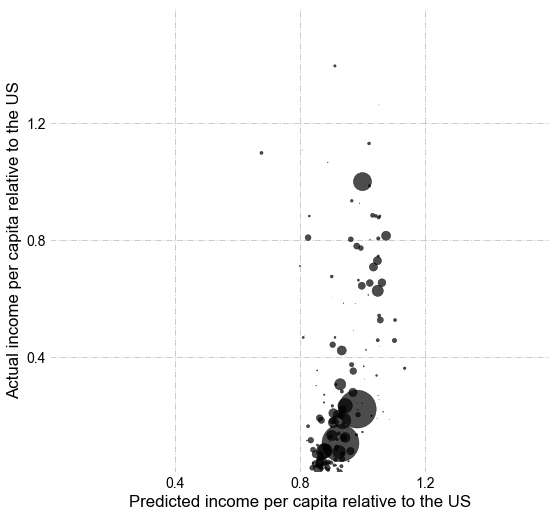

In [33]:
# var_names = ['rel_GDP_pred_inv','rel_GDP_pred_inv_emp','rel_GDP_pred_inv_emp_hc']
# var_name = var_names[0]
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(df_fundamentals['rel_GDP_cap_pop'],df_fundamentals['rel_GDP_cap'],
          sizes=df_fundamentals['pop'].values,color='k',alpha=.7)
ax.set_xlabel('Predicted income per capita relative to the US')
ax.set_ylabel('Actual income per capita relative to the US')
ticks = [.4,.8,1.2];
ax.set_xlim(0,1.6);
ax.set_ylim(0,1.6);
ax.set_xticks(ticks);
ax.set_yticks(ticks);

# ax.legend(loc='upper left',frameon=False)
plt.savefig('../files/rel_GDP_cap_pred_pop.svg',bbox_inches='tight')

In [34]:
df_fundamentals[['rel_GDP_cap_pop','rel_GDP_cap']].corr().round(decimals=2)

,rel_GDP_cap_pop,rel_GDP_cap
rel_GDP_cap_pop,1.00,0.22
rel_GDP_cap,0.22,1.00


In [35]:
# Load the data of mean years of schooling
# Lee-Lee (2016); Barro-Lee (2018) and UNDP HDR (2018) 
# via [Our World In Data](https://ourworldindata.org/grapher/mean-years-of-schooling-long-run?tab=chart)]
schooling = pd.read_csv('./mean-years-of-schooling-long-run.csv')

In [36]:
# Rename code variable so that we can match it with fundamentals data
schooling.rename(columns={'Code':'countrycode'},inplace=True)

In [37]:
# Merge with the fundamentals data
df_fundamentals=df_fundamentals.merge(schooling[schooling.Year==2017][
    ['countrycode','years of schooling']],on='countrycode',how='left')

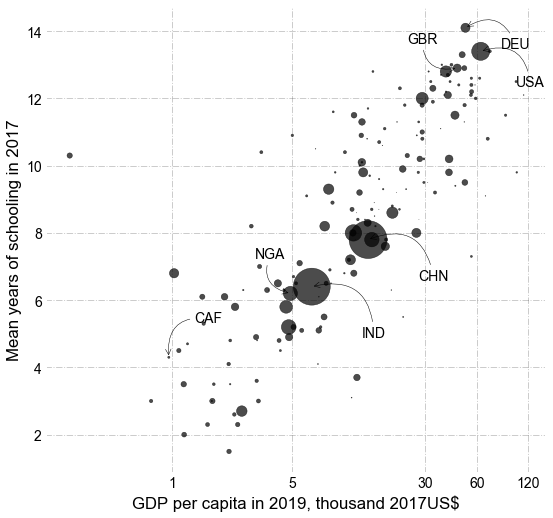

In [38]:
# yticks = np.array([1,5,30,60],dtype=int)
xticks = np.array([1,5,30,60,120],dtype=int)
data = df_fundamentals.copy()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data.gdpPercap,data['years of schooling'],color='k',sizes=data['pop'],alpha=.7)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_yticks(yticks)
#ax.set_yticklabels((yticks))
ax.set_xticks(xticks)
ax.set_xticklabels((xticks))
ax.set_xlabel(f'GDP per capita in {last_year}, thousand 2017US$')
ax.set_ylabel('Mean years of schooling in 2017')
usa_ = data[data.countrycode=='USA'][['gdpPercap','years of schooling']].values[0]
gbr_ = data[data.countrycode=='GBR'][['gdpPercap','years of schooling']].values[0]
chn_ = data[data.countrycode=='CHN'][['gdpPercap','years of schooling']].values[0]
ind_ = data[data.countrycode=='IND'][['gdpPercap','years of schooling']].values[0]
deu_ = data[data.countrycode=='DEU'][['gdpPercap','years of schooling']].values[0]
qat_ = data[data.countrycode=='QAT'][['gdpPercap','years of schooling']].values[0]
caf_ = data[data.countrycode=='CAF'][['gdpPercap','years of schooling']].values[0]
nga_ = data[data.countrycode=='NGA'][['gdpPercap','years of schooling']].values[0]
ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(-50, 25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(35, -20), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CAF", xy=(caf_[0],caf_[1]), xycoords="data",
    xytext=(25, +35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(50, -40), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(50, -50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "NGA", xy=(nga_[0],nga_[1]), xycoords="data",
    xytext=(-35, 35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
plt.savefig('../files/gdp-cap-schooling-label.svg',bbox_inches='tight')

In [39]:
# Solow model predicted income per worker (capita)
df_fundamentals['rel_GDP_pred_hc']=(df_fundamentals['hc']/df_fundamentals['hc, USA'])

In [40]:
df_fundamentals.dropna(inplace=True)

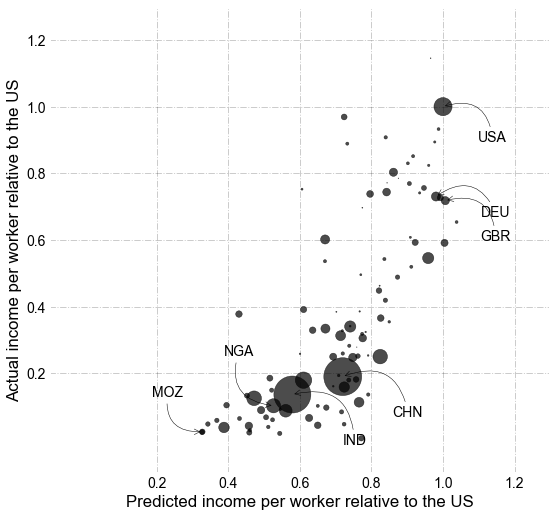

In [44]:
data = df_fundamentals.copy()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(df_fundamentals['rel_GDP_pred_hc'],df_fundamentals['rel_GDP'],
          sizes=df_fundamentals['pop'].values,color='k',alpha=.7)
ax.set_xlabel('Predicted income per worker relative to the US')
ax.set_ylabel('Actual income per worker relative to the US')
ticks = [0.2,.4,0.6,.8,1.0,1.2];
ax.set_xlim(-0.1,1.3);
ax.set_ylim(-0.1,1.3);
ax.set_xticks(ticks);
ax.set_yticks(ticks);

usa_ = data[data.countrycode=='USA'][['rel_GDP_pred_hc','rel_GDP']].values[0]
gbr_ = data[data.countrycode=='GBR'][['rel_GDP_pred_hc','rel_GDP']].values[0]
chn_ = data[data.countrycode=='CHN'][['rel_GDP_pred_hc','rel_GDP']].values[0]
ind_ = data[data.countrycode=='IND'][['rel_GDP_pred_hc','rel_GDP']].values[0]
deu_ = data[data.countrycode=='DEU'][['rel_GDP_pred_hc','rel_GDP']].values[0]
moz_ = data[data.countrycode=='MOZ'][['rel_GDP_pred_hc','rel_GDP']].values[0]
nga_ = data[data.countrycode=='NGA'][['rel_GDP_pred_hc','rel_GDP']].values[0]
ax.annotate(
    "USA", xy=(usa_[0],usa_[1]), xycoords="data",
    xytext=(35, -35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "GBR", xy=(gbr_[0],gbr_[1]), xycoords="data",
    xytext=(35, -40), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "DEU", xy=(deu_[0],deu_[1]), xycoords="data",
    xytext=(45, -20), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "MOZ", xy=(moz_[0],moz_[1]), xycoords="data",
    xytext=(-50, 35), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "CHN", xy=(chn_[0],chn_[1]), xycoords="data",
    xytext=(50, -40), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "IND", xy=(ind_[0],ind_[1]), xycoords="data",
    xytext=(50, -50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "NGA", xy=(nga_[0],nga_[1]), xycoords="data",
    xytext=(-50, 50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))

# # ax.legend(loc='upper left',frameon=False)
plt.savefig('../files/rel_GDP_pred_emp-label.svg',bbox_inches='tight')

In [42]:
# Correlation of predicited and actual values
df_fundamentals[['rel_GDP_pred_hc','rel_GDP']].corr().round(decimals=2)

,rel_GDP_pred_hc,rel_GDP
rel_GDP_pred_hc,1.00,0.71
rel_GDP,0.71,1.00
